### An example showing the plot_feature_importances method used by a scikit-learn classifier

In this example, we'll be plotting a `learning_curve` to describe the classifier model performance
using the **breast_cancer**, **iris** or **digits** dataset from scikit-learn.
- `LogisticRegression`
- `RandomForestClassifier`

Here, we'll be using the `scikitplot.estimators.plot_learning_curve` method.

In [1]:
from sklearn.datasets import (
    make_classification,
    load_breast_cancer as data_2_classes,
    load_iris as data_3_classes,
    load_digits as data_10_classes,
)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
import numpy as np; np.random.seed(0)
# importing pylab or pyplot
import matplotlib.pyplot as plt

# Import scikit-plot
import scikitplot as skplt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)

In [2]:
# Load the data
X, y = data_3_classes(return_X_y=True, as_frame=True)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=0)

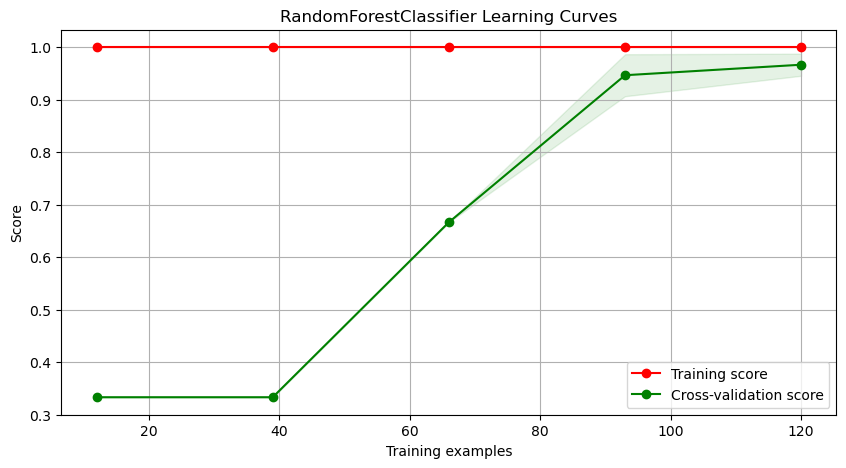

In [3]:
# Create an instance of the LogisticRegression
model = RandomForestClassifier(random_state=0)#.fit(X_train, y_train)

# Plot!
ax = skplt.estimators.plot_learning_curve(
    model, X, y
);

## Catboost

In [4]:
# !pip install catboost -Uq
import catboost
from catboost import CatBoostRegressor, Pool
from catboost import CatBoostClassifier, Pool
from catboost.utils import eval_metric

### Train model

In [5]:
model = CatBoostClassifier(
    iterations=250,
)
# %time clf.fit(train_pool, eval_set=test_pool, metric_period=10, plot=False, verbose=50)
model

/opt/conda/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.11/site-packages/catboost/core.py", line 5220, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "/opt/conda/lib/python3.11/site-packages/catboost/core.py", line 2400, in _fit
    s

CPU times: user 12 s, sys: 6.98 s, total: 19 s
Wall time: 9.34 s


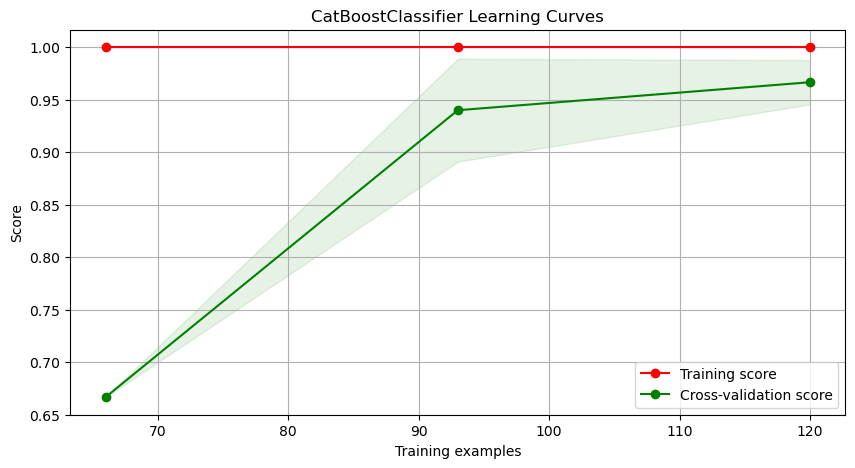

In [6]:
%%time

# Plot!
ax = skplt.estimators.plot_learning_curve(
    model, X, y,
    fit_params={
        # 'metric_period': 100,
        'verbose': 0
    }
);